Beaming and Boosting
============================

Due to concerns about accuracy, support for interpolated Beaming & Boosting was disabled in the version 2.2 release of PHOEBE (for details of why, please see previous versions of this tutorial page). In version 2.5, we return support for boosting with manual boosting factors.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.5 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.5"

Import all python modules that we'll need:

In [2]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

Set-up a binary that will have different boosting factors (in order to see the impact)

In [3]:
b=phoebe.default_binary()
b.set_value(qualifier='sma', component='binary', value=9.)
b.set_value(qualifier='q', component='binary', value=0.5)
b.set_value(qualifier='requiv', component='primary', value=3.8)
b.set_value(qualifier='requiv', component='secondary', value=2.5)
b.set_value(qualifier='teff', component='primary', value=16000)
b.set_value(qualifier='teff', component='secondary', value=11000)

Now let's add a light curve dataset (boosting factors are per dataset, so we need to add a dataset before setting the boosting factors)

In [4]:
b.add_dataset('lc',times=np.linspace(0,1,101))

<ParameterSet: 86 parameters | contexts: dataset, figure, compute, constraint>

These stars are roughly B5 and A0 main sequence stars. With logg of about 4 and 5 respectively, so let's set the boosting m factors based on the tables of Claret et al. (2020). https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/641/A157

In [5]:
b.set_value_all('boosting_method','manual')
b.set_value(qualifier='boosting_index', component='primary', value=1.7332)
b.set_value(qualifier='boosting_index', component='secondary', value=2.2841)

Run the model

In [6]:
b.run_compute(model='boosting')

100%|████████████████████████████████████████| 101/101 [00:00<00:00, 107.87it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

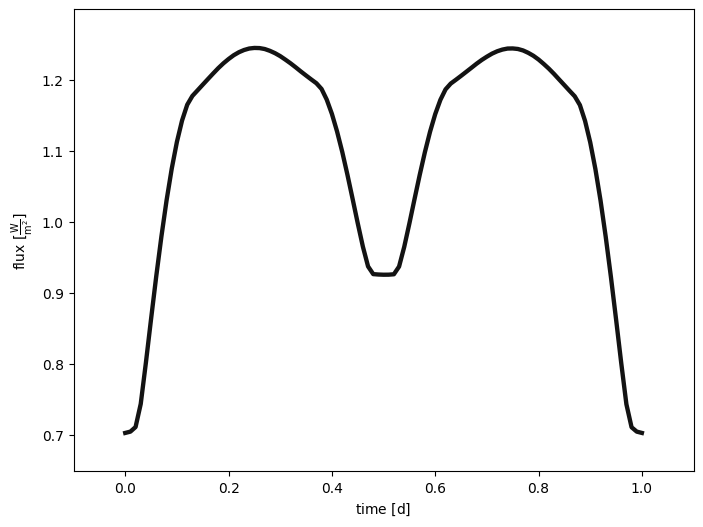

In [7]:
afig, mplfig = b.plot(show=True)

and now without boosting

In [8]:
b.set_value_all('boosting_method','none')
b.run_compute(model='noboosting')

100%|████████████████████████████████████████| 101/101 [00:00<00:00, 113.38it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

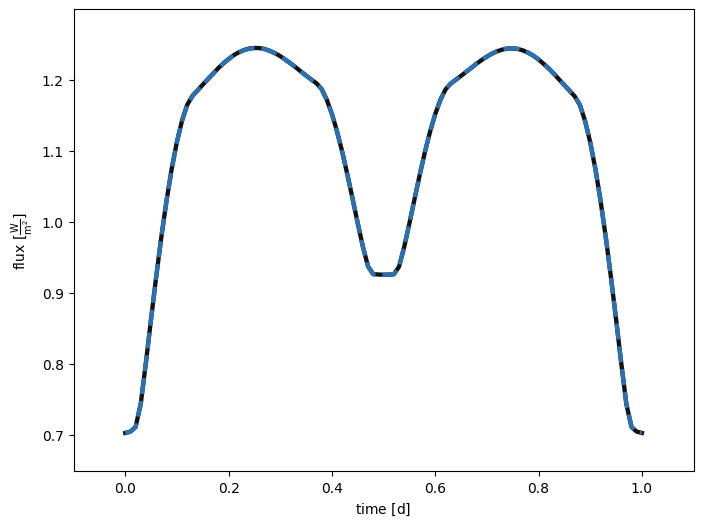

In [9]:
afig, mplfig = b.plot(show=True)

Let's plot the difference to make it clearer.

Text(0, 0.5, 'Flux difference [W/m$^2$]')

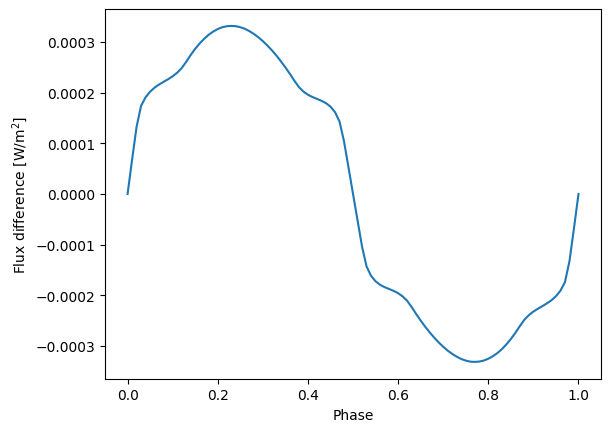

In [10]:
plt.plot(b['times@model@boosting'].value,b['fluxes@model@boosting'].value-b['fluxes@model@noboosting'].value)
plt.xlabel('Phase')
plt.ylabel(r'Flux difference [W/m$^2$]')

A small effect which can be much larger for compact binaries not covered by the standard CK2004 atmosphere table!